<h1>
    Sommaire<span class="tocSkip"></span>
</h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-1">
                    <span class="toc-item-num">1.&nbsp;&nbsp;</span>Chargement des données
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Segmentation-RFM-:-baseline" data-toc-modified-id="Segmentation-RFM-:-baseline-2">
                    <span class="toc-item-num">2.&nbsp;&nbsp;</span>Segmentation RFM : baseline
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Segmentation-kmeans-sur-plusieurs-variables-numériques" data-toc-modified-id="Segmentation-kmeans-sur-plusieurs-variables-numériques-3">
                    <span class="toc-item-num">3.&nbsp;&nbsp;</span>Segmentation kmeans sur plusieurs variables numériques
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Challenge-kmeans-avec-4-clusters" data-toc-modified-id="Challenge-kmeans-avec-4-clusters-31">
                            <span class="toc-item-num">3.1.&nbsp;&nbsp;</span>Challenge kmeans avec 4 clusters
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Segmentation-k-prototypes-sur-tout-type-de-variables" data-toc-modified-id="Segmentation-k-prototypes-sur-tout-type-de-variables-4">
                    <span class="toc-item-num">4.&nbsp;&nbsp;</span>Segmentation k prototypes sur tout type de variables
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Analyse-de-la-stabilité-de-la-segmentation" data-toc-modified-id="Analyse-de-la-stabilité-de-la-segmentation-5">
                    <span class="toc-item-num">5.&nbsp;&nbsp;</span>Analyse de la stabilité de la segmentation
                </a>
            </span>
        </li>
    </ul>
</div>

# Chargement des données

In [1]:
import pandas as pd

dossier_data = "data/"
nom_fichier = "dataset_clients.csv"
clients_data = pd.read_csv(dossier_data+nom_fichier)

In [2]:
clients_data

customer_unique_id  nb_orders  avg_nb_items  avg_basket  \
0      0000366f3b9a7992bf8c76cfdf3221e2          1           1.0      141.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f          1           1.0       27.19   
2      0000f46a3911fa3c0805444483337064          1           1.0       86.22   
3      0000f6ccb0745a6a4b88665a16c9f078          1           1.0       43.62   
4      0004aac84e0df4da2b147fca70cf8255          1           1.0      196.89   
...                                 ...        ...           ...         ...   
93352  fffcf5a5ff07b0908bd4e2dbc735a684          1           2.0     2067.42   
93353  fffea47cd6d3cc0a88bd621562a9d061          1           1.0       84.58   
93354  ffff371b4d645b6ecea244b27531430a          1           1.0      112.46   
93355  ffff5962728ec6157033ef9805bacc48          1           1.0      133.69   
93356  ffffd2657e2aad2907e67c3e9daecbeb          1           1.0       71.56   

      customer_state  recence  nb_reviews  avg_review_score  nb_sellers  \
0                 SP     40.0           1               5.0           1   
1                 SP     40.0           1               4.0           1   
2                 SC     54.0           1               3.0           1   
3                 PA     47.0           1               4.0           1   
4                 SP     46.0           1               5.0           1   
...              ...      ...         ...               ...         ...   
93352             PE     51.0           1               5.0           1   
93353             BA     45.0           1               4.0           1   
93354             MT     55.0           1               5.0           1   
93355             ES     40.0           1               5.0           1   
93356             PR     53.0           1               5.0           1   

         top_category  nb_different_product_categories  nb_payment_type_used  \
0      bed_bath_table                                1                     1   
1       health_beauty                                1                     1   
2          stationery                                1                     1   
3           telephony                                1                     1   
4           telephony                                1                     1   
...               ...                              ...                   ...   
93352   health_beauty                                1                     1   
93353            baby                                1                     1   
93354            auto                                1                     1   
93355   watches_gifts                                1                     1   
93356       perfumery                                1                     1   

      top_payment_type     gathered_customer_state  
0          credit_card   sao_paulo_and_rio_janeiro  
1          credit_card   sao_paulo_and_rio_janeiro  
2          credit_card  south_brazil_without_sp_rj  
3          credit_card                other_states  
4          credit_card   sao_paulo_and_rio_janeiro  
...                ...                         ...  
93352      credit_card                other_states  
93353      credit_card                other_states  
93354      credit_card                other_states  
93355      credit_card                other_states  
93356      credit_card  south_brazil_without_sp_rj  

[93357 rows x 14 columns]

# Segmentation RFM : baseline

In [3]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93357 entries, 0 to 93356
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_unique_id               93357 non-null  object 
 1   nb_orders                        93357 non-null  int64  
 2   avg_nb_items                     93357 non-null  float64
 3   avg_basket                       93357 non-null  float64
 4   customer_state                   93357 non-null  object 
 5   recence                          93357 non-null  float64
 6   nb_reviews                       93357 non-null  int64  
 7   avg_review_score                 93357 non-null  float64
 8   nb_sellers                       93357 non-null  int64  
 9   top_category                     93357 non-null  object 
 10  nb_different_product_categories  93357 non-null  int64  
 11  nb_payment_type_used             93357 non-null  int64  
 12  top_payment_type  

In [4]:
# conservation des données RFM
clients_data_RFM = clients_data[["nb_orders", "avg_basket", "recence"]]

In [5]:
# standardisation des variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

std_clients_data_RFM = pd.DataFrame(scaler.fit_transform(clients_data_RFM))
std_clients_data_RFM.columns = clients_data_RFM.columns
std_clients_data_RFM.index = clients_data_RFM.index

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# recherche du nombre de clusters optimal
liste_nb_clusters = range(2, 11)
scores_silhouette = []
scores_inertie = []
scores_davies_bouldin = []

for nb_clusters in liste_nb_clusters:
    recherche_kmeans = KMeans(n_clusters=nb_clusters).fit(std_clients_data_RFM)
    labels = recherche_kmeans.labels_
    scores_inertie.append(recherche_kmeans.inertia_)
    scores_silhouette.append(silhouette_score(std_clients_data_RFM, labels))
    scores_davies_bouldin.append(davies_bouldin_score(std_clients_data_RFM, labels))

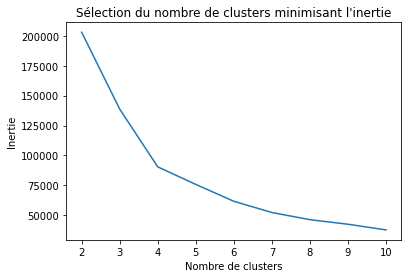

In [32]:
import matplotlib.pyplot as plt

plt.plot(liste_nb_clusters, scores_inertie)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Sélection du nombre de clusters minimisant l'inertie")
plt.show()

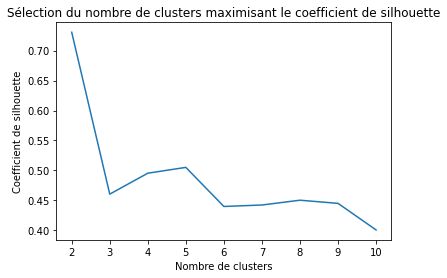

In [33]:
plt.plot(liste_nb_clusters, scores_silhouette)
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de silhouette")
plt.title("Sélection du nombre de clusters maximisant le coefficient de silhouette")
plt.show()

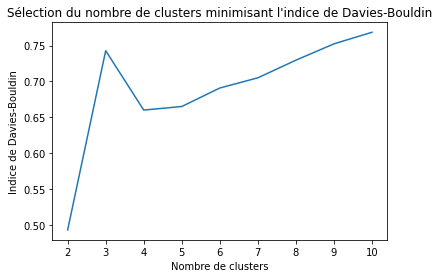

In [35]:
plt.plot(liste_nb_clusters, scores_davies_bouldin)
plt.xlabel("Nombre de clusters")
plt.ylabel("Indice de Davies-Bouldin")
plt.title("Sélection du nombre de clusters minimisant l'indice de Davies-Bouldin")
plt.show()

Le meilleur compromis entre la minimisation de l'inertie, du coefficient silhouette et la maximisation de l'indice de Davies-Bouldin est de choisir 4 clusters pour le k-means.

In [22]:
from sklearn.cluster import KMeans

# Application du kmeans avec 4 clusters
kmeans_RFM = KMeans(n_clusters=4).fit(std_clients_data_RFM)
clusters_RFM = kmeans_RFM.labels_
std_clients_data_RFM["cluster"] = clusters_RFM

In [23]:
std_clients_data_RFM

nb_orders  avg_basket    recence  cluster
0        4.78246    0.646309   7.856374        1
1        4.78246    0.123842   7.856374        1
2        4.78246    0.392704  10.606105        0
3        4.78246    0.198675   9.231240        0
4        4.78246    0.896770   9.034830        0
...          ...         ...        ...      ...
93352    4.78246    9.416429  10.016877        3
93353    4.78246    0.385235   8.838421        1
93354    4.78246    0.512219  10.802514        0
93355    4.78246    0.608915   7.856374        1
93356    4.78246    0.325933  10.409696        0

[93357 rows x 4 columns]

Populating the interactive namespace from numpy and matplotlib


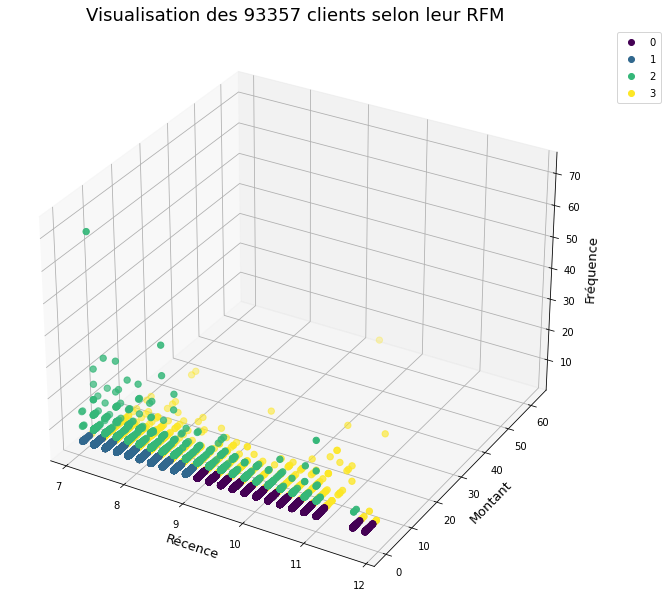

In [27]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns

# visualisation des clusters sur 3 dimensions
fig = plt.figure(figsize=[8,8])
#fig.patch.set_facecolor('#E0E0E0')
#fig.patch.set_alpha(0.7)
ax = Axes3D(fig)
plt.title("Visualisation des {} clients selon leur RFM".format(std_clients_data_RFM.shape[0]), fontsize=18)

# récupère les couleurs de seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# définit les couleurs différentes par rapport aux clusters
colors = std_clients_data_RFM["cluster"]

ax.set_xlabel('Récence', fontsize=13)
ax.set_ylabel('Montant', fontsize=13)
ax.set_zlabel('Fréquence', fontsize=13)
sc = ax.scatter(std_clients_data_RFM['recence'], std_clients_data_RFM['avg_basket'], std_clients_data_RFM['nb_orders'], 
                s=40, c=colors)

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2);

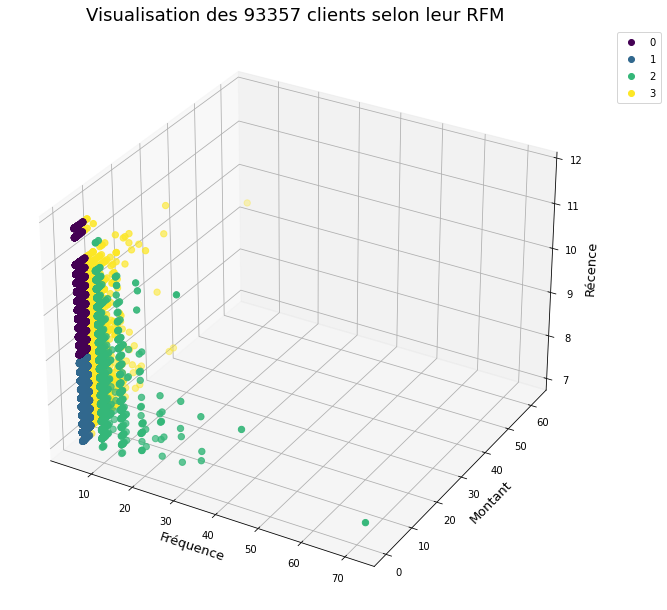

In [28]:
# visualisation des clusters sur 3 dimensions
fig = plt.figure(figsize=[8,8])
#fig.patch.set_facecolor('#E0E0E0')
#fig.patch.set_alpha(0.7)
ax = Axes3D(fig)
plt.title("Visualisation des {} clients selon leur RFM".format(std_clients_data_RFM.shape[0]), fontsize=18)

# définit les couleurs différentes par rapport aux clusters
colors = std_clients_data_RFM["cluster"]

ax.set_xlabel('Fréquence', fontsize=13)
ax.set_ylabel('Montant', fontsize=13)
ax.set_zlabel('Récence', fontsize=13)
sc = ax.scatter(std_clients_data_RFM['nb_orders'], std_clients_data_RFM['avg_basket'], std_clients_data_RFM['recence'], 
                s=40, c=colors)

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2);

# Segmentation kmeans sur plusieurs variables numériques

In [3]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93357 entries, 0 to 93356
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_unique_id               93357 non-null  object 
 1   nb_orders                        93357 non-null  int64  
 2   avg_nb_items                     93357 non-null  float64
 3   avg_basket                       93357 non-null  float64
 4   customer_state                   93357 non-null  object 
 5   recence                          93357 non-null  float64
 6   nb_reviews                       93357 non-null  int64  
 7   avg_review_score                 93357 non-null  float64
 8   nb_sellers                       93357 non-null  int64  
 9   top_category                     93357 non-null  object 
 10  nb_different_product_categories  93357 non-null  int64  
 11  nb_payment_type_used             93357 non-null  int64  
 12  top_payment_type  

In [4]:
clients_data_kmeans = clients_data[["nb_orders", "avg_nb_items", "avg_basket", "recence", 
                                    "nb_reviews", "avg_review_score", "nb_sellers", "nb_different_product_categories",
                                    "nb_payment_type_used"]]

In [5]:
# standardisation des variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

std_clients_data_kmeans = pd.DataFrame(scaler.fit_transform(clients_data_kmeans))
std_clients_data_kmeans.columns = clients_data_kmeans.columns
std_clients_data_kmeans.index = clients_data_kmeans.index

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# recherche du nombre de clusters optimal
liste_nb_clusters = range(2, 11)
scores_silhouette = []
scores_inertie = []
scores_davies_bouldin = []

for nb_clusters in liste_nb_clusters:
    recherche_kmeans = KMeans(n_clusters=nb_clusters, random_state=10).fit(std_clients_data_kmeans)
    labels = recherche_kmeans.labels_
    scores_inertie.append(recherche_kmeans.inertia_)
    scores_silhouette.append(silhouette_score(std_clients_data_kmeans, labels))
    scores_davies_bouldin.append(davies_bouldin_score(std_clients_data_kmeans, labels))

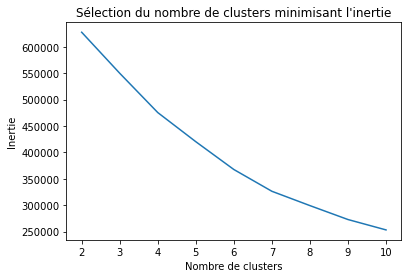

In [39]:
import matplotlib.pyplot as plt

plt.plot(liste_nb_clusters, scores_inertie)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Sélection du nombre de clusters minimisant l'inertie")
plt.show()

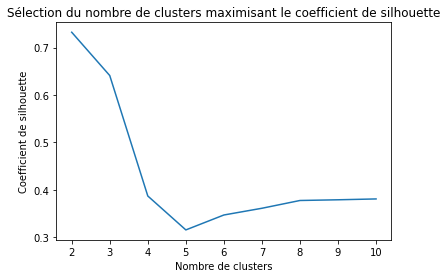

In [40]:
plt.plot(liste_nb_clusters, scores_silhouette)
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de silhouette")
plt.title("Sélection du nombre de clusters maximisant le coefficient de silhouette")
plt.show()

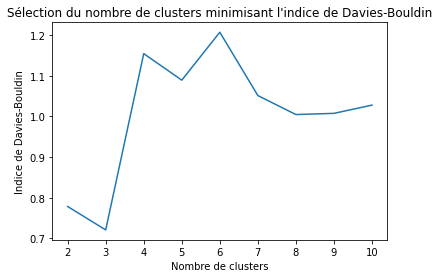

In [41]:
plt.plot(liste_nb_clusters, scores_davies_bouldin)
plt.xlabel("Nombre de clusters")
plt.ylabel("Indice de Davies-Bouldin")
plt.title("Sélection du nombre de clusters minimisant l'indice de Davies-Bouldin")
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.6408478251690112
For n_clusters = 4 The average silhouette_score is : 0.3867644619484567
For n_clusters = 7 The average silhouette_score is : 0.36087356314646396
For n_clusters = 8 The average silhouette_score is : 0.37727445156331624


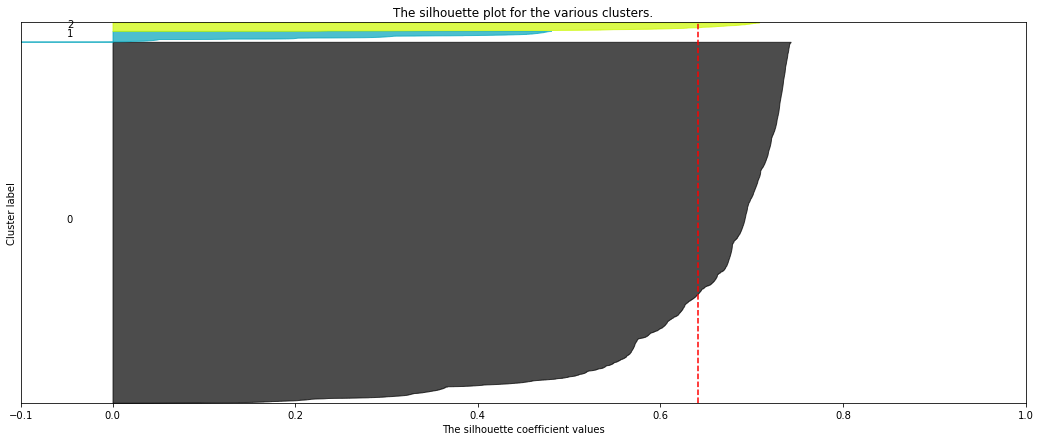

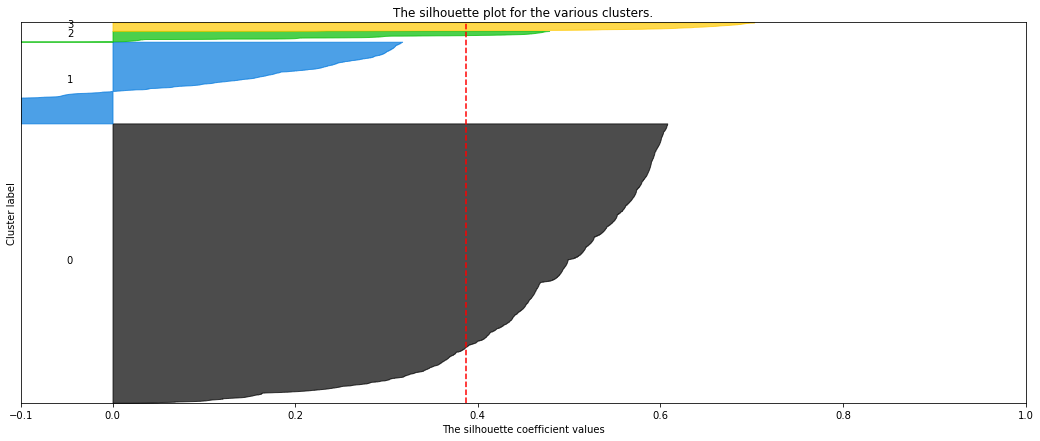

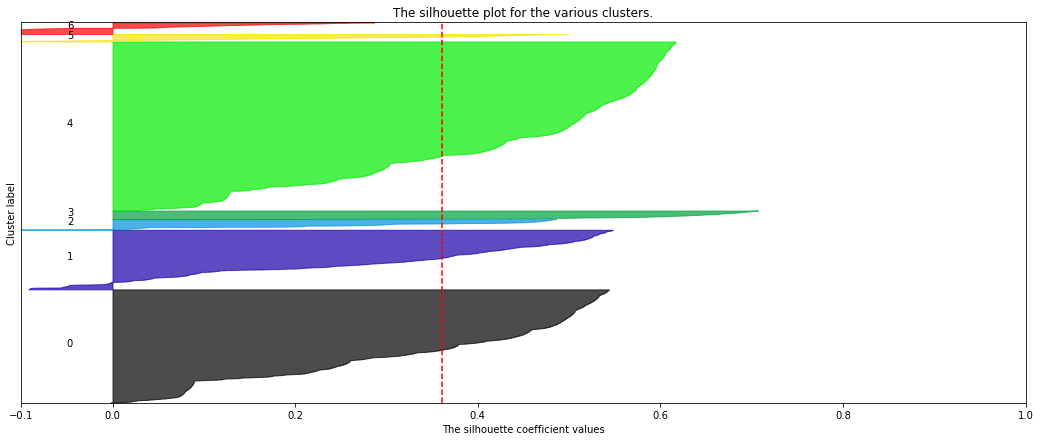

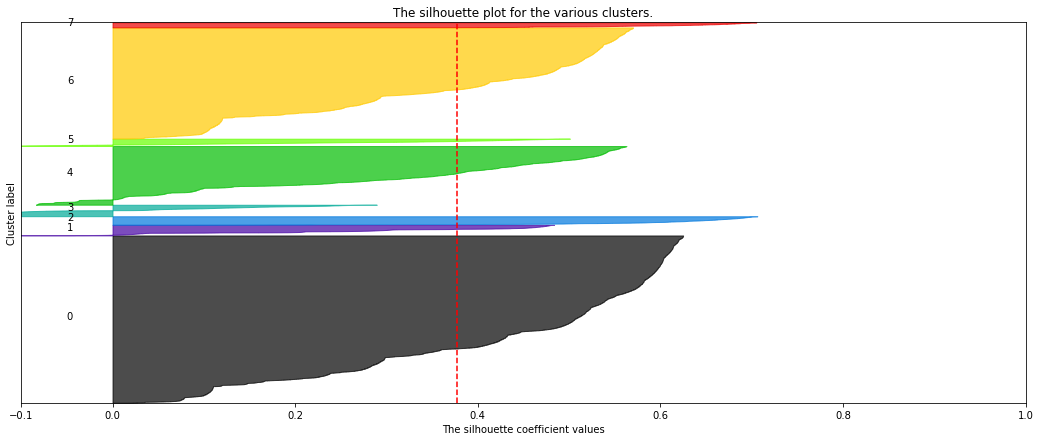

In [6]:
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [3, 4, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_clients_data_kmeans) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(std_clients_data_kmeans)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(std_clients_data_kmeans, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_clients_data_kmeans, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ## 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(std_clients_data_kmeans[:, 0], std_clients_data_kmeans[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #            c=colors, edgecolor='k')
#
    ## Labeling the clusters
    #centers = clusterer.cluster_centers_
    ## Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #            c="white", alpha=1, s=200, edgecolor='k')
#
    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                s=50, edgecolor='k')
#
    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")
#
    #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
    #              "with n_clusters = %d" % n_clusters),
    #             fontsize=14, fontweight='bold')

plt.show()

Au vu des différents scores calculés, les nombres de clusters qui pouvaient être utilisés pour optimiser le clustering sont 3, 7 et 8. Avec l'analyse du score silhouette, on voit le score moyen est plus élevé avec 3 clusters et que pour chacune des 3 analyses, un cluster a un score silhouette sous le score moyen. Vis-à-vis du métier, il paraît plus pertinent de choisir 3 clusters.

In [43]:
from sklearn.cluster import KMeans

# Application du kmeans avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=10).fit(std_clients_data_kmeans)
clusters_kmeans = kmeans.labels_

In [44]:
from sklearn import decomposition

acp = decomposition.PCA(n_components=2)
cp_kmeans = pd.DataFrame(data=acp.fit_transform(std_clients_data_kmeans), columns=["cp_1", "cp_2"])
cp_kmeans["cluster"] = clusters_kmeans

In [45]:
print(acp.explained_variance_ratio_)
print(acp.explained_variance_ratio_.sum())

[0.3385588 0.1404477]
0.4790065058262517


Environ 48% de la variance est expliquée par les deux premières composantes principales de l'ACP.

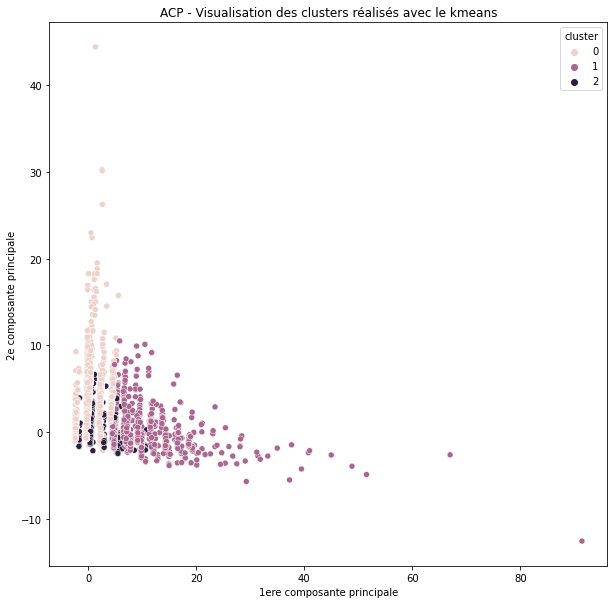

In [46]:
import seaborn as sns

fig=plt.figure(figsize=[10, 10])
plt.xlabel("1ere composante principale")
plt.ylabel("2e composante principale")
plt.title("ACP - Visualisation des clusters réalisés avec le kmeans")
sns.scatterplot(data=cp_kmeans, x="cp_1", y="cp_2", hue="cluster");

In [48]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2)
cp_kmeans_tsne = pd.DataFrame(data=tsne.fit_transform(std_clients_data_kmeans), columns=["cp_1", "cp_2"])
cp_kmeans_tsne["cluster"] = clusters_kmeans

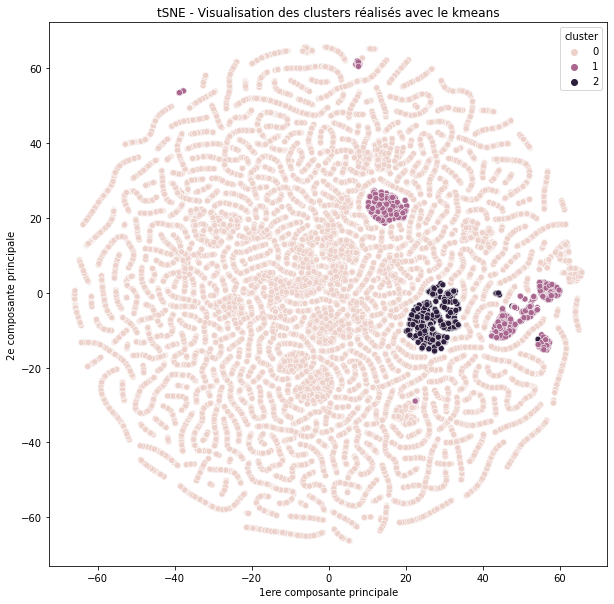

In [49]:
import seaborn as sns

fig=plt.figure(figsize=[10, 10])
plt.xlabel("1ere composante principale")
plt.ylabel("2e composante principale")
plt.title("tSNE - Visualisation des clusters réalisés avec le kmeans")
sns.scatterplot(data=cp_kmeans_tsne, x="cp_1", y="cp_2", hue="cluster");

## Challenge kmeans avec 4 clusters

Le but de faire un kmeans avec 4 clusters est de voir si l'on peut équilibrer les clusters afin que ce soit mieux exploité par le marketing.

Automatically created module for IPython interactive environment
For n_clusters = 4 The average silhouette_score is : 0.3867644619484567
For n_clusters = 5 The average silhouette_score is : 0.3151871244653369
For n_clusters = 6 The average silhouette_score is : 0.34668250811721235


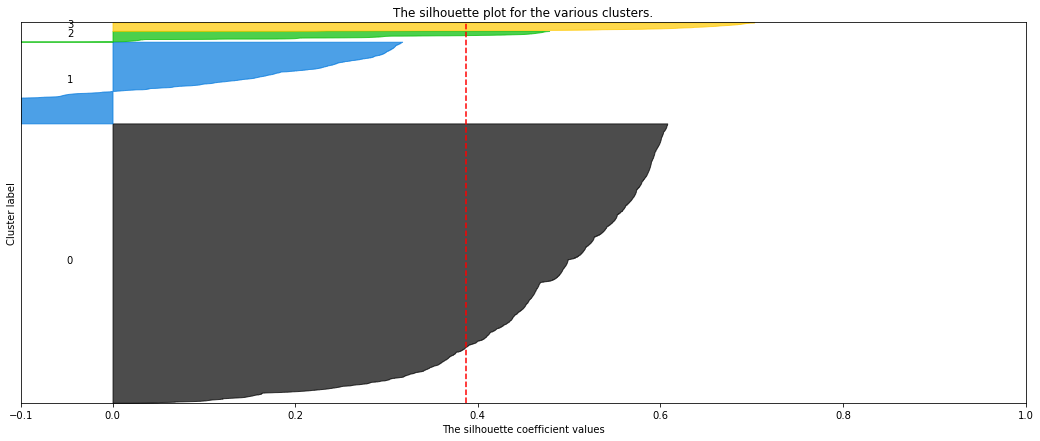

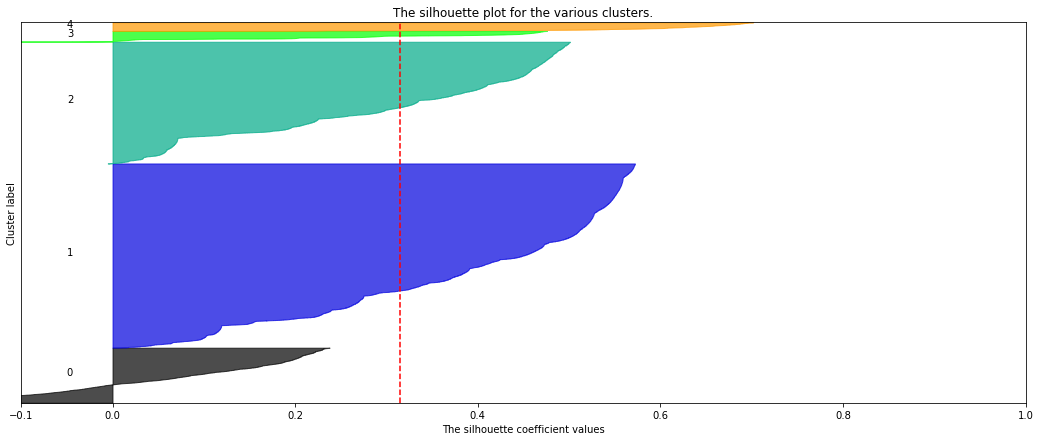

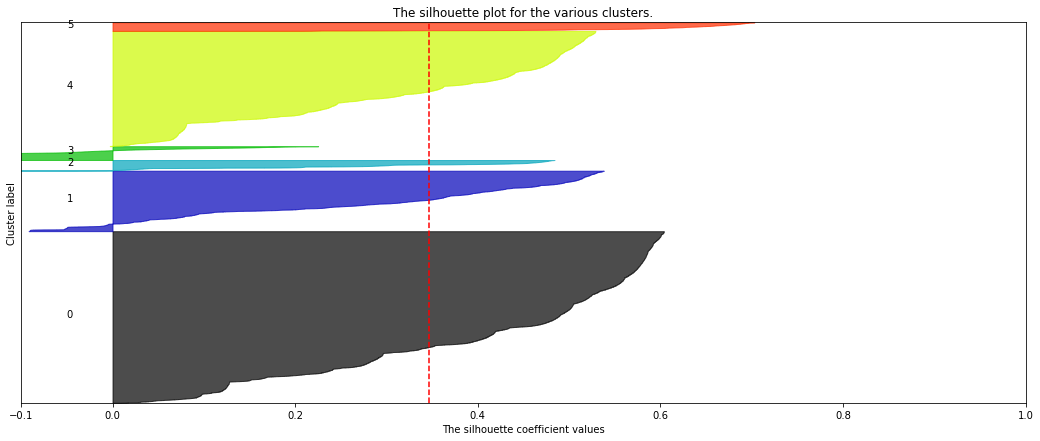

In [7]:
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_clients_data_kmeans) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(std_clients_data_kmeans)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(std_clients_data_kmeans, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_clients_data_kmeans, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ## 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(std_clients_data_kmeans[:, 0], std_clients_data_kmeans[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #            c=colors, edgecolor='k')
#
    ## Labeling the clusters
    #centers = clusterer.cluster_centers_
    ## Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #            c="white", alpha=1, s=200, edgecolor='k')
#
    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                s=50, edgecolor='k')
#
    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")
#
    #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
    #              "with n_clusters = %d" % n_clusters),
    #             fontsize=14, fontweight='bold')

plt.show()

In [8]:
from sklearn.cluster import KMeans

# Application du kmeans avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=10).fit(std_clients_data_kmeans)
clusters_kmeans = kmeans.labels_

In [9]:
from sklearn import decomposition

acp = decomposition.PCA(n_components=2)
cp_kmeans = pd.DataFrame(data=acp.fit_transform(std_clients_data_kmeans), columns=["cp_1", "cp_2"])
cp_kmeans["cluster"] = clusters_kmeans

In [10]:
print(acp.explained_variance_ratio_)
print(acp.explained_variance_ratio_.sum())

[0.3385588 0.1404477]
0.47900650582625115


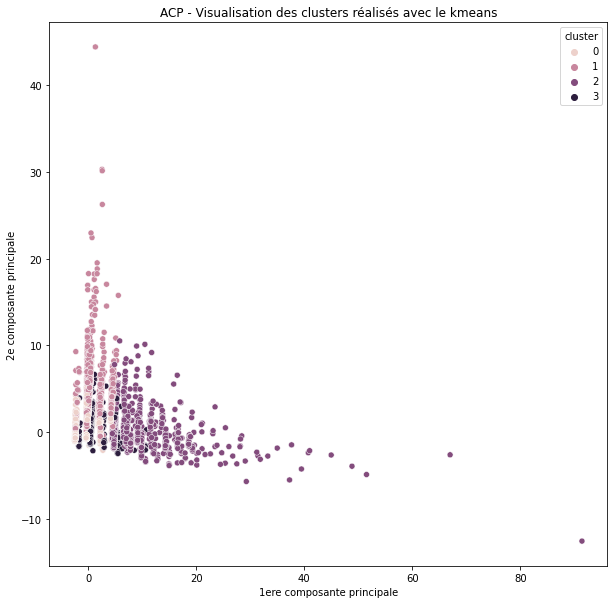

In [11]:
import seaborn as sns

fig=plt.figure(figsize=[10, 10])
plt.xlabel("1ere composante principale")
plt.ylabel("2e composante principale")
plt.title("ACP - Visualisation des clusters réalisés avec le kmeans")
sns.scatterplot(data=cp_kmeans, x="cp_1", y="cp_2", hue="cluster");

In [12]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2)
cp_kmeans_tsne = pd.DataFrame(data=tsne.fit_transform(std_clients_data_kmeans), columns=["cp_1", "cp_2"])
cp_kmeans_tsne["cluster"] = clusters_kmeans

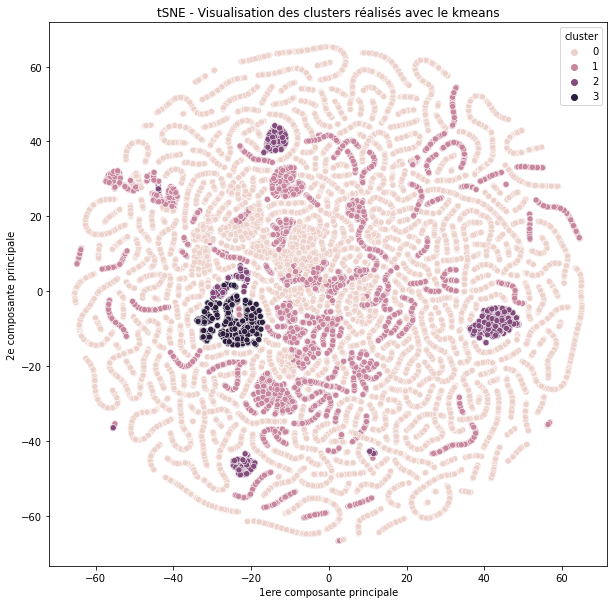

In [13]:
import seaborn as sns

fig=plt.figure(figsize=[10, 10])
plt.xlabel("1ere composante principale")
plt.ylabel("2e composante principale")
plt.title("tSNE - Visualisation des clusters réalisés avec le kmeans")
sns.scatterplot(data=cp_kmeans_tsne, x="cp_1", y="cp_2", hue="cluster");

# Segmentation k prototypes sur tout type de variables

In [2]:
# installation du package kmodes
!pip install kmodes

In [3]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93357 entries, 0 to 93356
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_unique_id               93357 non-null  object 
 1   nb_orders                        93357 non-null  int64  
 2   avg_nb_items                     93357 non-null  float64
 3   avg_basket                       93357 non-null  float64
 4   customer_state                   93357 non-null  object 
 5   recence                          93357 non-null  float64
 6   nb_reviews                       93357 non-null  int64  
 7   avg_review_score                 93357 non-null  float64
 8   nb_sellers                       93357 non-null  int64  
 9   top_category                     93357 non-null  object 
 10  nb_different_product_categories  93357 non-null  int64  
 11  nb_payment_type_used             93357 non-null  int64  
 12  top_payment_type  

In [15]:
clients_data_kprototypes = clients_data[["nb_orders", "avg_nb_items", "avg_basket", "customer_state", "recence", 
                                         "nb_reviews", "avg_review_score", "nb_sellers", "top_category",
                                         "nb_different_product_categories", "nb_payment_type_used", "top_payment_type"]]

Avant de réaliser le kprototypes, on standardise les données numériques.

In [16]:
# Identification des variables numérique (celles dont le type est différent de object)
s = (clients_data_kprototypes.dtypes != 'object')
variables_numeriques = list(s[s].index)
variables_categorielles = [colonne for colonne in clients_data_kprototypes.columns if colonne not in variables_numeriques]

In [17]:
# Dataset avec uniquement les données numériques
clients_data_kprototypes_num = clients_data_kprototypes[variables_numeriques]

In [18]:
# standardisation des variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

std_clients_data_kprototypes = pd.DataFrame(scaler.fit_transform(clients_data_kprototypes_num))
std_clients_data_kprototypes.columns = clients_data_kprototypes_num.columns
std_clients_data_kprototypes.index = clients_data_kprototypes_num.index

In [19]:
# On ajoute les données qualitatives aux données numériques standardisées
clients_data_kprototypes_cat = clients_data_kprototypes[variables_categorielles]
std_clients_data_kprototypes = pd.concat([std_clients_data_kprototypes, clients_data_kprototypes_cat], axis=1)

In [20]:
# Identification des index des colonnes catégorielles
index_colonnes_cat = [std_clients_data_kprototypes.columns.get_loc(col) 
                      for col in list(std_clients_data_kprototypes.select_dtypes('object').columns)]

In [13]:
# Echantillonage du dataset pour la recherche du nombre de clusters
sample_clients_data_kprototypes = std_clients_data_kprototypes.sample(10000)

In [14]:
from kmodes.kprototypes import KPrototypes
#from sklearn.metrics import silhouette_score
#from sklearn.metrics import davies_bouldin_score

# recherche du nombre de clusters optimal
liste_nb_clusters = range(2, 11)
#scores_silhouette = []
scores_inertie = []
#scores_davies_bouldin = []

for nb_clusters in liste_nb_clusters:
    recherche_kprototypes = KPrototypes(n_clusters=nb_clusters, random_state=10).fit(sample_clients_data_kprototypes, 
                                                                                     categorical=index_colonnes_cat)
    labels = recherche_kprototypes.labels_
    scores_inertie.append(recherche_kprototypes.cost_)
    #scores_silhouette.append(silhouette_score(std_clients_data_kprototypes, labels))
    #scores_davies_bouldin.append(davies_bouldin_score(std_clients_data_kprototypes, labels))

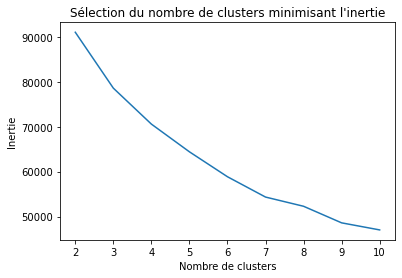

In [15]:
import matplotlib.pyplot as plt

plt.plot(liste_nb_clusters, scores_inertie)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Sélection du nombre de clusters minimisant l'inertie")
plt.show()

Pour le k-prototype, je sélectionnerai 4 ou 5 clusters.

In [18]:
kprototypes_4 = KPrototypes(n_clusters=4, random_state=10).fit(std_clients_data_kprototypes, categorical=index_colonnes_cat)
clusters_kprototypes_4 = kprototypes_4.labels_

Encodage des variables catégorielles pour visualiser les clusters

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
enc_clients_data_kprototypes = std_clients_data_kprototypes
enc_clients_data_kprototypes[variables_categorielles] = pd.DataFrame(ordinal_encoder.fit_transform(
                                                                std_clients_data_kprototypes[variables_categorielles]))

In [32]:
from sklearn import decomposition

acp = decomposition.PCA(n_components=2)
cp_kmeans = pd.DataFrame(data=acp.fit_transform(enc_clients_data_kprototypes), columns=["cp_1", "cp_2"])
cp_kmeans["cluster"] = clusters_kmeans

In [34]:
print(acp.explained_variance_ratio_)
print(acp.explained_variance_ratio_.sum())

[0.89842358 0.08569812]
0.9841217007400906


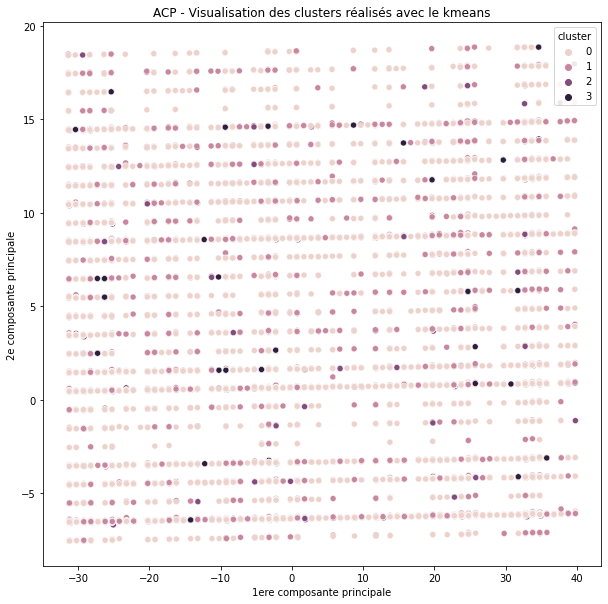

In [35]:
import seaborn as sns

fig=plt.figure(figsize=[10, 10])
plt.xlabel("1ere composante principale")
plt.ylabel("2e composante principale")
plt.title("ACP - Visualisation des clusters réalisés avec le kmeans")
sns.scatterplot(data=cp_kmeans, x="cp_1", y="cp_2", hue="cluster");

In [33]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2)
cp_kmeans_tsne = pd.DataFrame(data=tsne.fit_transform(enc_clients_data_kprototypes), columns=["cp_1", "cp_2"])
cp_kmeans_tsne["cluster"] = clusters_kmeans

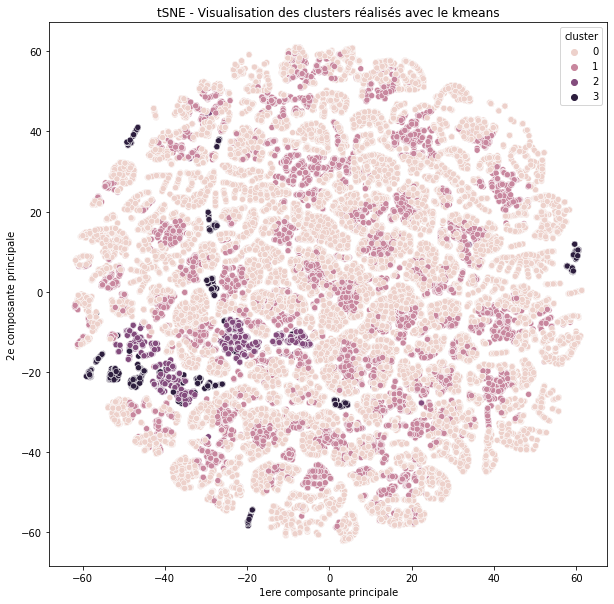

In [36]:
import seaborn as sns

fig=plt.figure(figsize=[10, 10])
plt.xlabel("1ere composante principale")
plt.ylabel("2e composante principale")
plt.title("tSNE - Visualisation des clusters réalisés avec le kmeans")
sns.scatterplot(data=cp_kmeans_tsne, x="cp_1", y="cp_2", hue="cluster");

Au vu des visualisations des clusters, c'est le kmeans qui permet de séparer au mieux les clients en différents groupes. D'un point de vue métier, le kmeans avec 4 clusters permet d'avoir des clusters plus équilibrés. C'est donc ce modèle qui est privilégié.

# Analyse de la stabilité de la segmentation

Pour rappel, la segmentation donnant le meilleur compromis entre de bons résultats et qui puisse être facilement exploitée par le département marketing est **le k-means sur variables numériques avec 4 clusters**.

Pour analyser la stabilité de cette segmentation, je l'appliquerai initialement sur 30K clients. Puis je l'appliquerai de nouveau en ajoutant 10K clients (environ) supplémentaires jusqu'à ce que le réservoir de clients soit épuisé. À chaque ajout de clients, le score ARI sera calculé et son évolution sera alors analysé.

In [10]:
clients_data

customer_unique_id  nb_orders  avg_nb_items  avg_basket  \
0      0000366f3b9a7992bf8c76cfdf3221e2          1           1.0      141.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f          1           1.0       27.19   
2      0000f46a3911fa3c0805444483337064          1           1.0       86.22   
3      0000f6ccb0745a6a4b88665a16c9f078          1           1.0       43.62   
4      0004aac84e0df4da2b147fca70cf8255          1           1.0      196.89   
...                                 ...        ...           ...         ...   
93352  fffcf5a5ff07b0908bd4e2dbc735a684          1           2.0     2067.42   
93353  fffea47cd6d3cc0a88bd621562a9d061          1           1.0       84.58   
93354  ffff371b4d645b6ecea244b27531430a          1           1.0      112.46   
93355  ffff5962728ec6157033ef9805bacc48          1           1.0      133.69   
93356  ffffd2657e2aad2907e67c3e9daecbeb          1           1.0       71.56   

      customer_state  recence  nb_reviews  avg_review_score  nb_sellers  \
0                 SP     40.0           1               5.0           1   
1                 SP     40.0           1               4.0           1   
2                 SC     54.0           1               3.0           1   
3                 PA     47.0           1               4.0           1   
4                 SP     46.0           1               5.0           1   
...              ...      ...         ...               ...         ...   
93352             PE     51.0           1               5.0           1   
93353             BA     45.0           1               4.0           1   
93354             MT     55.0           1               5.0           1   
93355             ES     40.0           1               5.0           1   
93356             PR     53.0           1               5.0           1   

         top_category  nb_different_product_categories  nb_payment_type_used  \
0      bed_bath_table                                1                     1   
1       health_beauty                                1                     1   
2          stationery                                1                     1   
3           telephony                                1                     1   
4           telephony                                1                     1   
...               ...                              ...                   ...   
93352   health_beauty                                1                     1   
93353            baby                                1                     1   
93354            auto                                1                     1   
93355   watches_gifts                                1                     1   
93356       perfumery                                1                     1   

      top_payment_type     gathered_customer_state  
0          credit_card   sao_paulo_and_rio_janeiro  
1          credit_card   sao_paulo_and_rio_janeiro  
2          credit_card  south_brazil_without_sp_rj  
3          credit_card                other_states  
4          credit_card   sao_paulo_and_rio_janeiro  
...                ...                         ...  
93352      credit_card                other_states  
93353      credit_card                other_states  
93354      credit_card                other_states  
93355      credit_card                other_states  
93356      credit_card  south_brazil_without_sp_rj  

[93357 rows x 14 columns]

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

scaler = StandardScaler(with_mean=False)

clients_data_stabilite = clients_data[["customer_unique_id", "nb_orders", "avg_nb_items", "avg_basket", "recence", 
                                       "nb_reviews", "avg_review_score", "nb_sellers", "nb_different_product_categories",
                                       "nb_payment_type_used"]]

# initialisation de la sélection de clients
selection_clients = clients_data_stabilite.sample(30000)
index_clients_suivis = selection_clients.index
id_clients = selection_clients.customer_unique_id

# retrait des clients sélectionnés du dataset
liste_id_clients_selectionnes = id_clients.tolist()
clients_data_stabilite = clients_data_stabilite[~clients_data_stabilite.customer_unique_id.isin(liste_id_clients_selectionnes)]

# standardisation des données pour le k-means
selection_clients.drop(columns=['customer_unique_id'], inplace=True)
std_selection_clients = pd.DataFrame(scaler.fit_transform(selection_clients))
std_selection_clients.columns = selection_clients.columns
std_selection_clients.index = selection_clients.index
selection_clients['customer_unique_id'] = id_clients

kmeans = KMeans(n_clusters=4).fit(std_selection_clients)
clusters_initiaux_clients_suivis = pd.DataFrame(data=kmeans.labels_, columns=['cluster'])
clusters_initiaux_clients_suivis.index = std_selection_clients.index

scores_ari = []

# tant qu'il y a encore des clients dans le dataset on en rajoute 10K dans la sélection de clients
while len(clients_data_stabilite) > 0:
    
    print(len(clients_data_stabilite))
    
    if len(clients_data_stabilite) >= 10000:
        tirage_clients = clients_data_stabilite.sample(10000)
    else:
        tirage_clients = clients_data_stabilite.sample(len(clients_data_stabilite))
    
    # ajout des clients tirés dans la sélection
    selection_clients = pd.concat([selection_clients, tirage_clients])
    id_clients = selection_clients.customer_unique_id
    
    # retrait des clients sélectionnés du dataset
    liste_id_clients_selectionnes = id_clients.tolist()
    clients_data_stabilite = clients_data_stabilite[~clients_data_stabilite.customer_unique_id.isin(liste_id_clients_selectionnes)]
    
    # standardisation des données pour le k-means
    selection_clients.drop(columns=['customer_unique_id'], inplace=True)
    std_selection_clients = pd.DataFrame(scaler.fit_transform(selection_clients))
    std_selection_clients.columns = selection_clients.columns
    std_selection_clients.index = selection_clients.index
    selection_clients['customer_unique_id'] = id_clients
    
    kmeans = KMeans(n_clusters=4).fit(std_selection_clients)
    selection_clients['cluster'] = kmeans.labels_

    # calcul du score ARI
    ari = adjusted_rand_score(clusters_initiaux_clients_suivis['cluster'].loc[index_clients_suivis], 
                              selection_clients['cluster'].loc[index_clients_suivis])
    nb_clients_ajoutes = len(selection_clients) - 30000
    scores_ari.append([nb_clients_ajoutes, ari])
    
    # suppression du champ cluster
    if len(clients_data_stabilite) != 0:
        selection_clients.drop(columns=['cluster'], inplace=True)
        
scores_ari = pd.DataFrame(scores_ari, columns=["clients_ajoutes", "ARI"])

63357
53357
43357
33357
23357
13357
3357


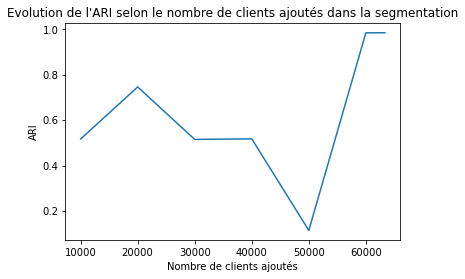

In [92]:
import matplotlib.pyplot as plt

plt.plot(scores_ari['clients_ajoutes'], scores_ari['ARI'])
plt.xlabel("Nombre de clients ajoutés")
plt.ylabel("ARI")
plt.title("Evolution de l'ARI selon le nombre de clients ajoutés dans la segmentation")
plt.show()